In [135]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [136]:
#Reading the data
df=pd.read_csv("day.csv")

In [137]:
#Understanding the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [138]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [139]:
df.shape

(730, 16)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


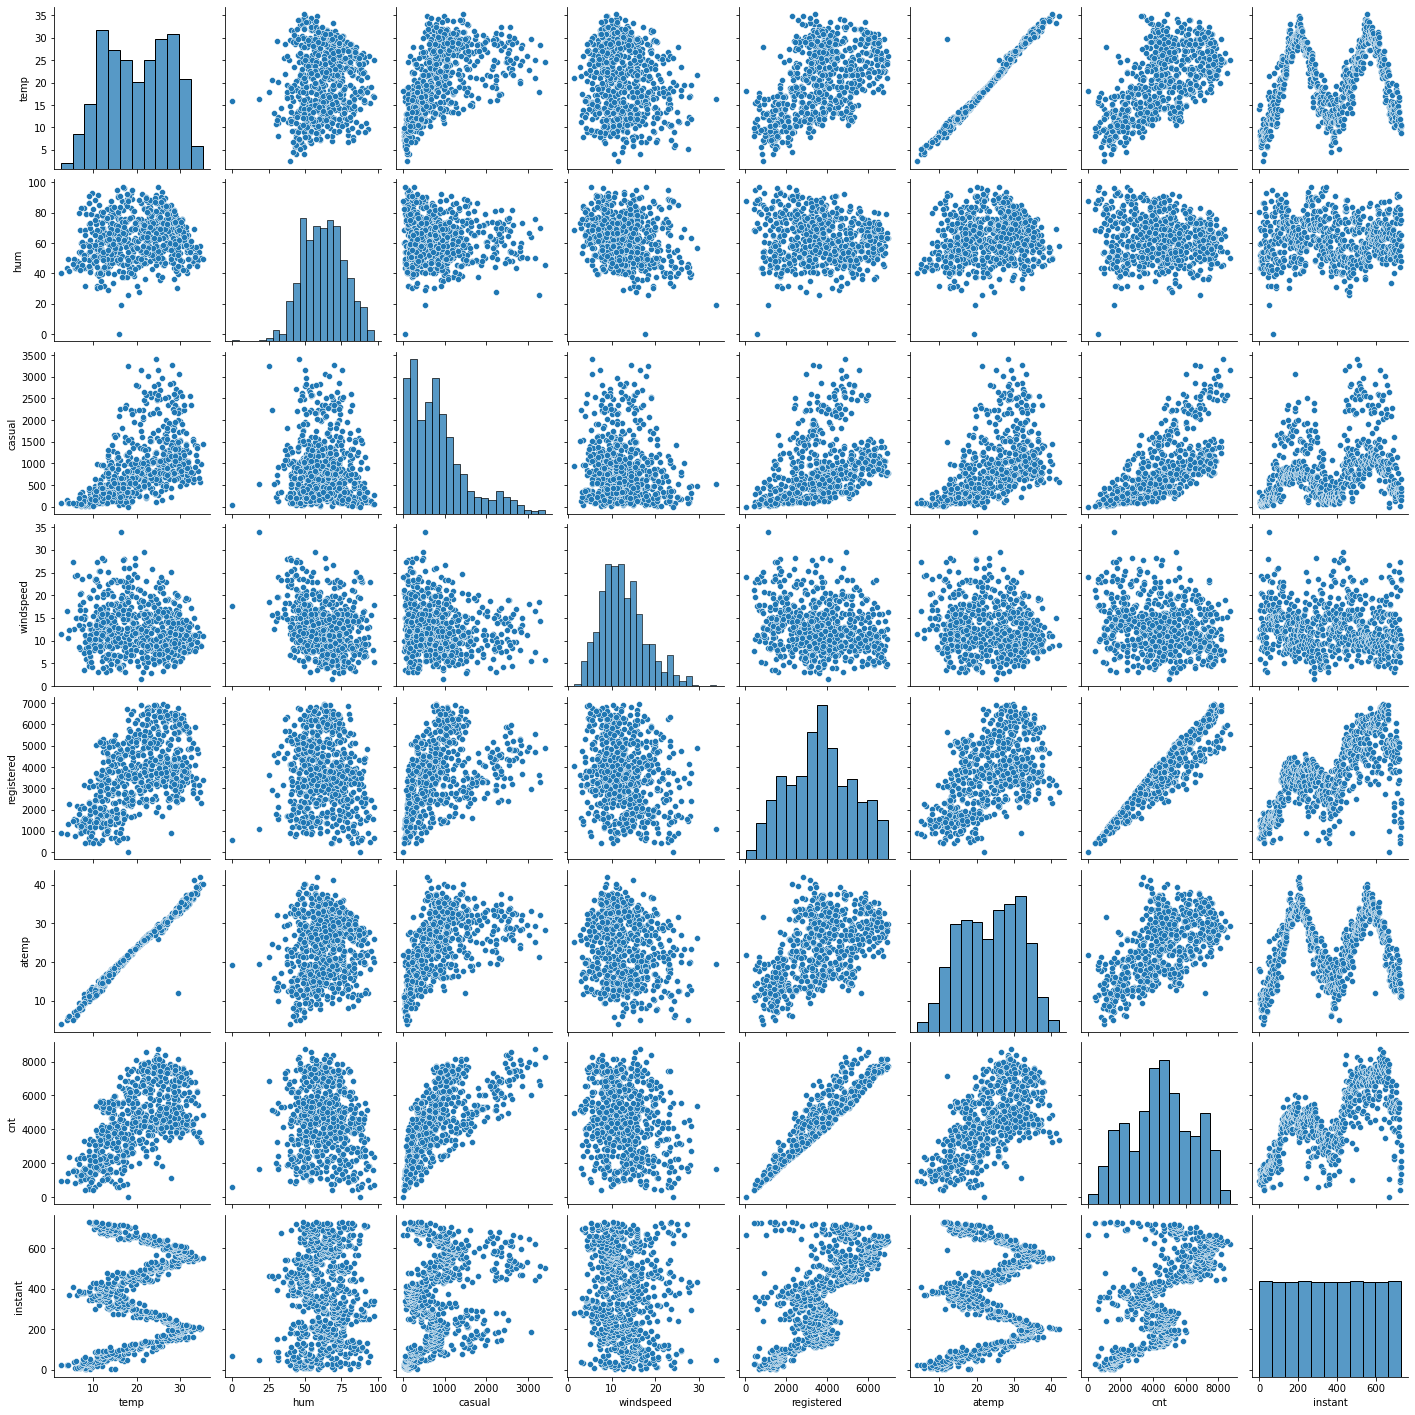

In [141]:
#Visualization of data
sns.pairplot(df,vars=['temp',"hum","casual","windspeed","registered","atemp","cnt","instant"])
plt.show()

In [142]:
df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [143]:
#mapping categorical variables with their subcategories
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain + Ice Pallets'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


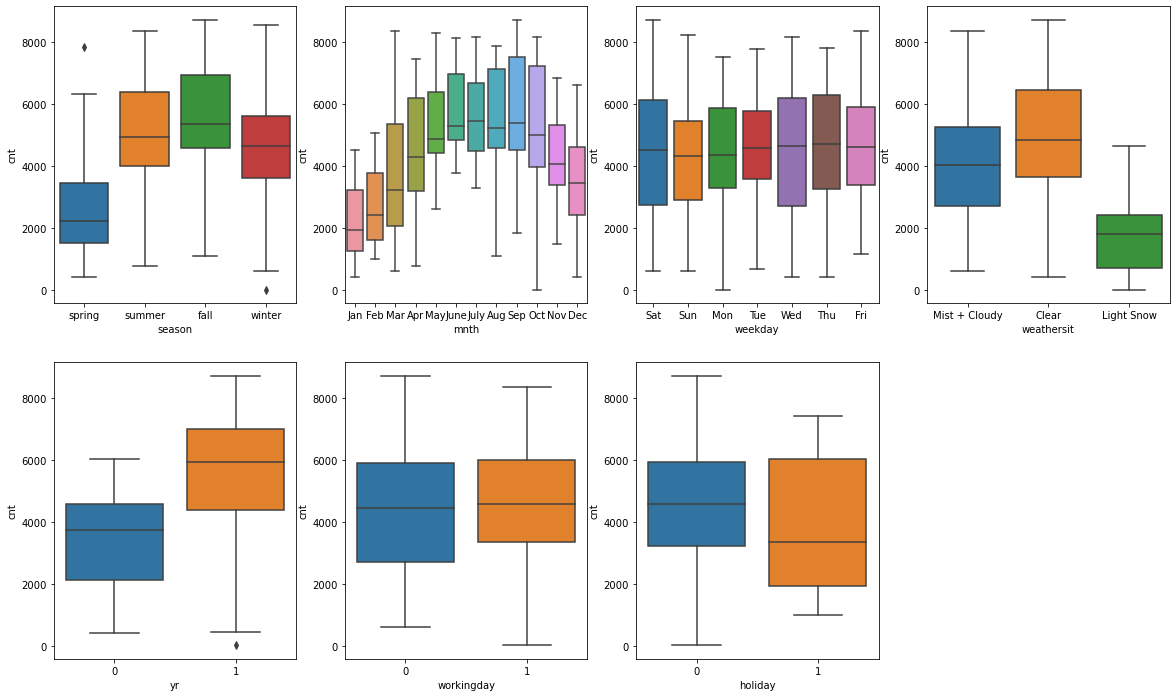

In [144]:
#visualizing the categorical variables 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

In [145]:
#Observations
#1.People are likely to rent bikes mostly in fall season
#2.Bike rentals are more in Sep
#3.Bikes are mostly rented on Wed, Thu and Sat
#4.Bikes are mostly rented during clear weather
#5.Bikes were rented more during 2019
#6.Bikes are mostly rented during holidays

In [146]:
# checking correlation between variables

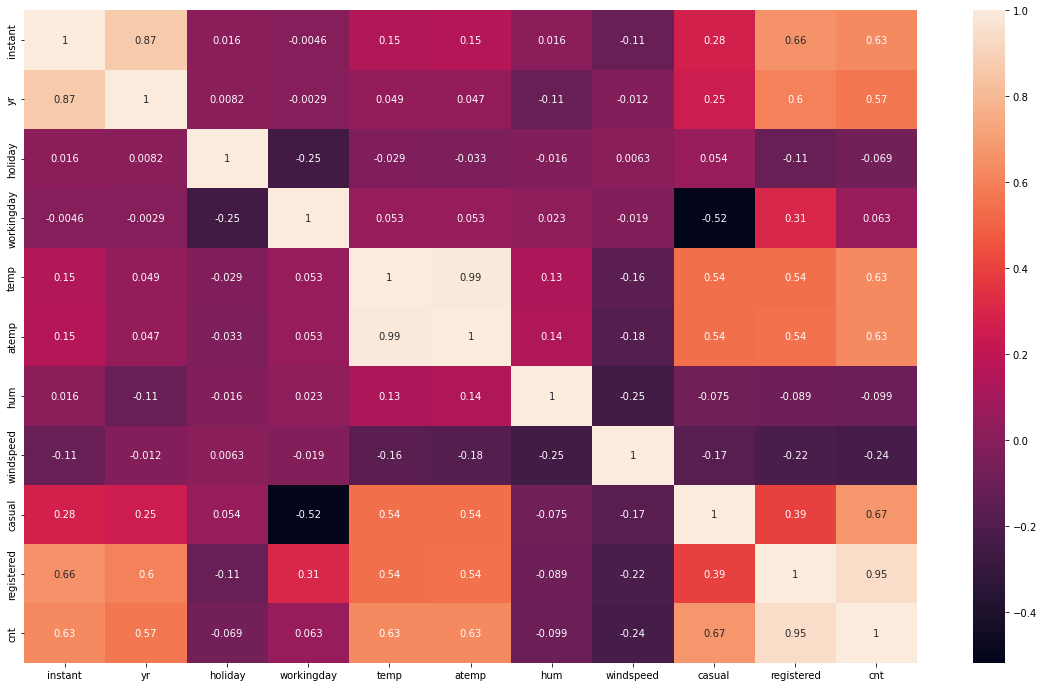

In [147]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [148]:
# There are several variables correlated with cnt like registered, casual, atemp(temp is already present),instant,dteday

In [149]:
df=df.drop(['atemp','instant','casual','registered','dteday'],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [150]:
df.shape

(730, 11)

In [151]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [153]:
# Creating dummy variables
month = pd.get_dummies(df.mnth,drop_first=True)
weekday = pd.get_dummies(df.weekday,drop_first=True)
weathersit=pd.get_dummies(df.weathersit,drop_first=True)
season=pd.get_dummies(df.season,drop_first=True)

In [154]:
#adding the dummy variables
df=pd.concat([df,month,weekday,weathersit,season],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [155]:
#dropping the variables for which dummies have been created
df.drop(['mnth','weekday','weathersit','season'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [156]:
df.shape

(730, 29)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

In [158]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.084932,0.084932,0.076712,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.278971,0.278971,0.266317,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


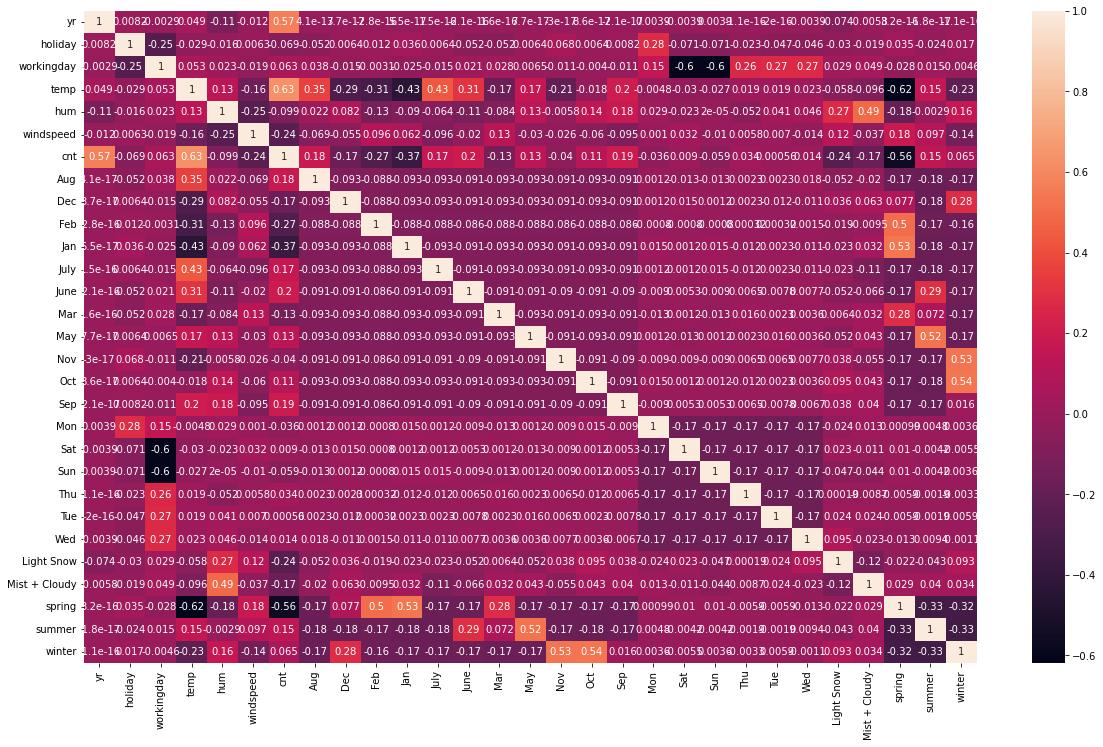

In [159]:
#checking correlation between the variables
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [160]:
#Preparing the data for model training

In [161]:
#splitting the dataset into train and test sets
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [162]:
df_train.shape

(510, 29)

In [163]:
df_test.shape

(220, 29)

In [164]:
#Scaling the variables
scaler=MinMaxScaler()
scaler_var=['hum','windspeed','temp','cnt']
df_train[scaler_var]=scaler.fit_transform(df_train[scaler_var])


In [165]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


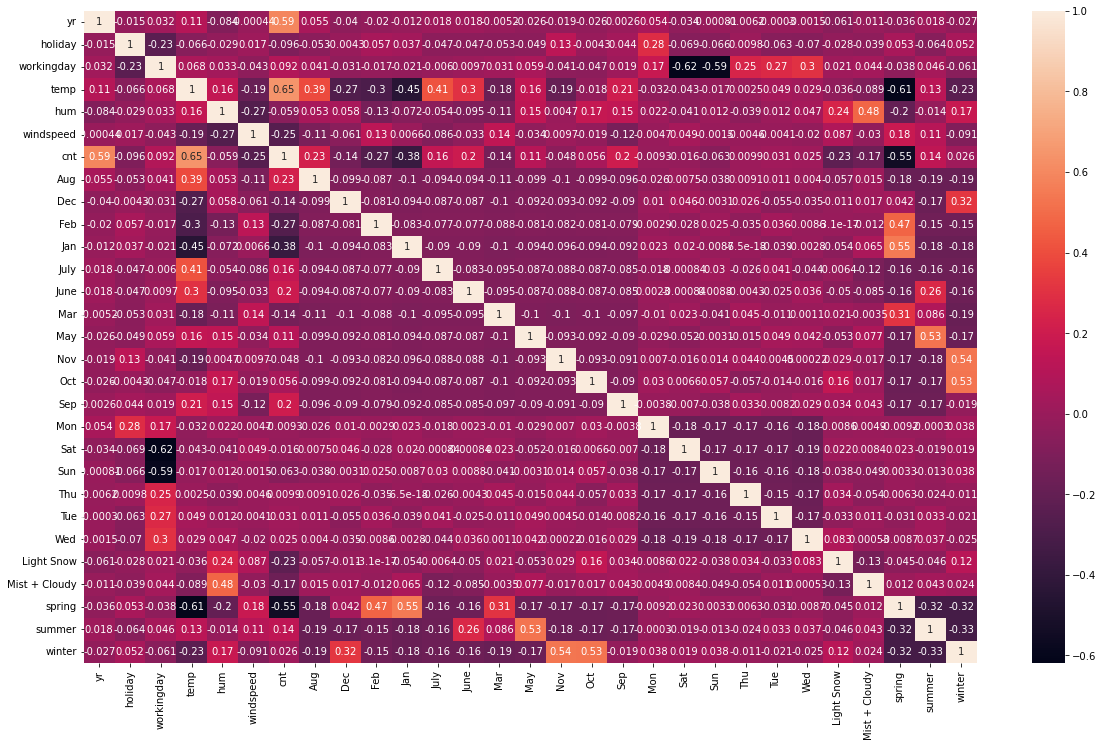

In [166]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

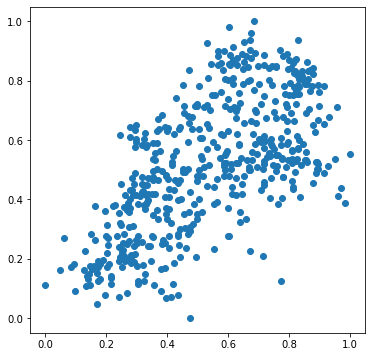

In [167]:
#checking correlation between temp and count as temp seems to have high correlation
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp,df_train.cnt)
plt.show()

In [168]:
#Training the model
#First using the variable temp
y_train=df_train.pop('cnt')
X_train=df_train

In [169]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [170]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [171]:
#adding a constant(intercept)
X_train_sm=sm.add_constant(X_train['temp'])

In [172]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [173]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.46e-61
Time:                        04:13:58   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

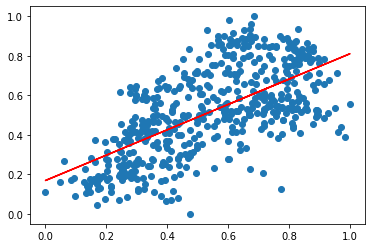

In [174]:
#Visualizing data with scatter plot and fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:,1],y_train)
plt.plot(X_train_sm.iloc[:,1],0.1690+.6409*X_train_sm.iloc[:,1],'r')
plt.show()

In [175]:
#adding another variable - yr
X_train_sm=X_train[['temp','yr']]
X_train_sm=sm.add_constant(X_train_sm)

In [176]:
#create 2nd model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [177]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.34e-130
Time:                        04:14:00   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
#adding all variables
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [183]:
X_train_sm=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params


const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [184]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.00e-181
Time:                        04:17:52   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.46e+16
================================================================

In [ ]:
# R-Squared is 0.853 which means 85% of the variance in count is explained by all the variables

In [185]:
# Using RFE Method

In [186]:
len(df.columns)

29

In [187]:
#Creating RFE Object
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [188]:
#Setting feature selection to 15 variables
rfe=RFE(lm,n_features_to_select=15)

In [189]:
# Fitting RFE Object on the dataset
rfe=rfe.fit(X_train,y_train)

In [190]:
#Checking the elements
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 13),
 ('Feb', False, 10),
 ('Jan', True, 1),
 ('July', False, 14),
 ('June', False, 5),
 ('Mar', False, 6),
 ('May', False, 4),
 ('Nov', False, 8),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 9),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 3),
 ('summer', True, 1),
 ('winter', True, 1)]

In [191]:
true_rfe=X_train.columns[rfe.support_]
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Aug', 'Jan',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'summer', 'winter'],
      dtype='object')

In [192]:
len(true_rfe)

15

In [196]:
X_train_rfe=X_train[true_rfe]

In [198]:
#Adding constant to training variable
X_train_rfe=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_rfe)
lr_model=lr.fit()
lr_model.params

const            0.172681
yr               0.229871
holiday         -0.023340
workingday       0.076845
temp             0.515579
hum             -0.160306
windspeed       -0.187902
Aug              0.050370
Jan             -0.037397
Sep              0.116986
Sat              0.085805
Sun              0.033371
Light Snow      -0.244850
Mist + Cloudy   -0.056483
summer           0.096690
winter           0.137466
dtype: float64

In [199]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.01e-191
Time:                        04:26:57   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1727      0.023      7.601      0.000       0.128       0.217
yr                0.2299      0.008     28.744      0.000       0.214       0.246
holiday          -0.0233      0.021     -1.123      0.262      -0.064       0.017
workingday        0.0768      0.009      8.650      0.000       0.059       0.094
temp              0.5156      0.024     21.197      0.000       0.468       0.563
hum              -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed        -0.1879      0.025     -7.411      0.000      -0.238      -0.138
Aug               0.0504      0.016      3.133      0.002       0.019       0.082
Jan              -0.0374      0.017     -2.164      0.031      -0.071      -0.003
Sep               0.1170      0.016      7.317      0.000       0.086       0.148
Sat               0.0858      0.011      7.789      0.000       0.064       0.107
Sun               0.0334      0.012      2.878      0.004       0.011       0.056
Light Snow       -0.2449      0.026     -9.423      0.000      -0.296      -0.194
Mist + Cloudy    -0.0565      0.010     -5.455      0.000      -0.077      -0.036
summer            0.0967      0.011      8.705      0.000       0.075       0.119
winter            0.1375      0.011     11.978      0.000       0.115       0.160
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                     2.68e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [200]:
#Checking VIF
X_train_rfe=X_train_rfe.drop(['const'],axis=1)

In [202]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,33.996034
9,Sat,8.376676
10,Sun,8.196672
1,holiday,2.238183
3,temp,1.944447
4,hum,1.879584
14,winter,1.581749
12,Mist + Cloudy,1.564274
7,Jan,1.551543
13,summer,1.481659


In [203]:
#Dropping workingday variable due to high VIF
X_train_new_1=X_train_rfe.drop(['workingday'],axis=1)

In [204]:
#adding constant to training variable
X_train_lr1=sm.add_constant(X_train_new_1)
lr = sm.OLS(y_train, X_train_lr1)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.01e-191
Time:                        04:34:28   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2495      0.028      8.943      0.000       0.195       0.304
yr                0.2299      0.008     28.744      0.000       0.214       0.246
holiday          -0.1002      0.025     -3.954      0.000      -0.150      -0.050
temp              0.5156      0.024     21.197      0.000       0.468       0.563
hum              -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed        -0.1879      0.025     -7.411      0.000      -0.238      -0.138
Aug               0.0504      0.016      3.133      0.002       0.019       0.082
Jan              -0.0374      0.017     -2.164      0.031      -0.071      -0.003
Sep               0.1170      0.016      7.317      0.000       0.086       0.148
Sat               0.0090      0.011      0.805      0.421      -0.013       0.031
Sun              -0.0435      0.012     -3.769      0.000      -0.066      -0.021
Light Snow       -0.2449      0.026     -9.423      0.000      -0.296      -0.194
Mist + Cloudy    -0.0565      0.010     -5.455      0.000      -0.077      -0.036
summer            0.0967      0.011      8.705      0.000       0.075       0.119
winter            0.1375      0.011     11.978      0.000       0.115       0.160
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
#Checking VIF of the model
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [206]:
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,18.410998
2,temp,11.433542
4,windspeed,3.677399
11,Mist + Cloudy,2.171669
13,winter,2.047957
0,yr,2.038362
12,summer,1.959090
5,Aug,1.599308
6,Jan,1.549660
7,Sep,1.322548


In [207]:
#hum variable can be dropped due to high VIF
X_train_new_2 = X_train_lr1.drop(['hum'], axis = 1)

In [208]:
X_train_lr2 = sm.add_constant(X_train_new_2)

lr = sm.OLS(y_train, X_train_lr2)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.55e-189
Time:                        04:41:22   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1614      0.019      8.311      0.000       0.123       0.200
yr                0.2336      0.008     28.879      0.000       0.218       0.250
holiday          -0.1014      0.026     -3.933      0.000      -0.152      -0.051
temp              0.4920      0.024     20.393      0.000       0.445       0.539
windspeed        -0.1583      0.025     -6.372      0.000      -0.207      -0.110
Aug               0.0487      0.016      2.980      0.003       0.017       0.081
Jan              -0.0431      0.018     -2.458      0.014      -0.078      -0.009
Sep               0.1109      0.016      6.843      0.000       0.079       0.143
Sat               0.0109      0.011      0.959      0.338      -0.011       0.033
Sun              -0.0466      0.012     -3.973      0.000      -0.070      -0.024
Light Snow       -0.2889      0.024    -11.871      0.000      -0.337      -0.241
Mist + Cloudy    -0.0820      0.009     -9.475      0.000      -0.099      -0.065
summer            0.0931      0.011      8.256      0.000       0.071       0.115
winter            0.1270      0.011     11.121      0.000       0.105       0.149
==============================================================================
Omnibus:                       62.535   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.370
Skew:                          -0.654   Prob(JB):                     2.71e-32
Kurtosis:                       5.265   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
#Checking the VIF of the model
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.177246
3,windspeed,3.421174
0,yr,2.037644
11,summer,1.894461
4,Aug,1.598910
12,winter,1.567368
10,Mist + Cloudy,1.545347
6,Sep,1.316281
5,Jan,1.234576
7,Sat,1.222527


In [210]:
#Dropping sat variable due to low VIF and high p-value
X_train_new_3 = X_train_lr2.drop(['Sat'], axis = 1)

In [211]:
X_train_lr3 = sm.add_constant(X_train_new_3)
lr = sm.OLS(y_train, X_train_lr3)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.83e-190
Time:                        04:46:42   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -990.9
Df Residuals:                     497   BIC:                            -935.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1635      0.019      8.469      0.000       0.126       0.201
yr                0.2334      0.008     28.866      0.000       0.218       0.249
holiday          -0.1036      0.026     -4.033      0.000      -0.154      -0.053
temp              0.4914      0.024     20.376      0.000       0.444       0.539
windspeed        -0.1572      0.025     -6.333      0.000      -0.206      -0.108
Aug               0.0490      0.016      2.999      0.003       0.017       0.081
Jan              -0.0430      0.018     -2.450      0.015      -0.077      -0.009
Sep               0.1110      0.016      6.848      0.000       0.079       0.143
Sun              -0.0486      0.012     -4.218      0.000      -0.071      -0.026
Light Snow       -0.2888      0.024    -11.871      0.000      -0.337      -0.241
Mist + Cloudy    -0.0821      0.009     -9.483      0.000      -0.099      -0.065
summer            0.0930      0.011      8.248      0.000       0.071       0.115
winter            0.1272      0.011     11.147      0.000       0.105       0.150
==============================================================================
Omnibus:                       59.202   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.743
Skew:                          -0.611   Prob(JB):                     1.66e-31
Kurtosis:                       5.275   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
#Dropping constant variables and checking VIF
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.137237
3,windspeed,3.357317
0,yr,2.036990
10,summer,1.894238
4,Aug,1.598578
11,winter,1.555977
9,Mist + Cloudy,1.544970
6,Sep,1.316223
5,Jan,1.227057
7,Sun,1.171654


In [213]:
#Residual Analysis
X_train_lr3 = sm.add_constant(X_train_lr3)
X_train_lr3

,const,yr,holiday,temp,windspeed,Aug,Jan,Sep,Sun,Light Snow,Mist + Cloudy,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,1,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,0,0,1,1,0


In [214]:
y_train_pred = lr_model.predict(X_train_lr3)

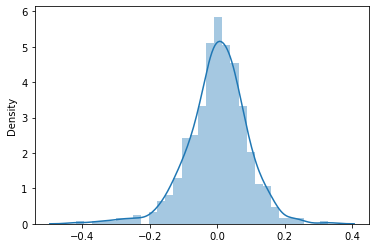

In [215]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

In [216]:
#Making predictions on test set
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [217]:
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [218]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
y_test = df_test.pop('cnt')
X_test = df_test

In [220]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [221]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [222]:
X_train_lr3.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Aug', 'Jan', 'Sep',
       'Sun', 'Light Snow', 'Mist + Cloudy', 'summer', 'winter'],
      dtype='object')

In [225]:
X_train_lr3.drop(columns= 'const', inplace = True)

In [226]:
X_test_new = X_test[X_train_lr3.columns]
X_test_new = sm.add_constant(X_test_new)

In [227]:
y_pred = lr_model.predict(X_test_new)

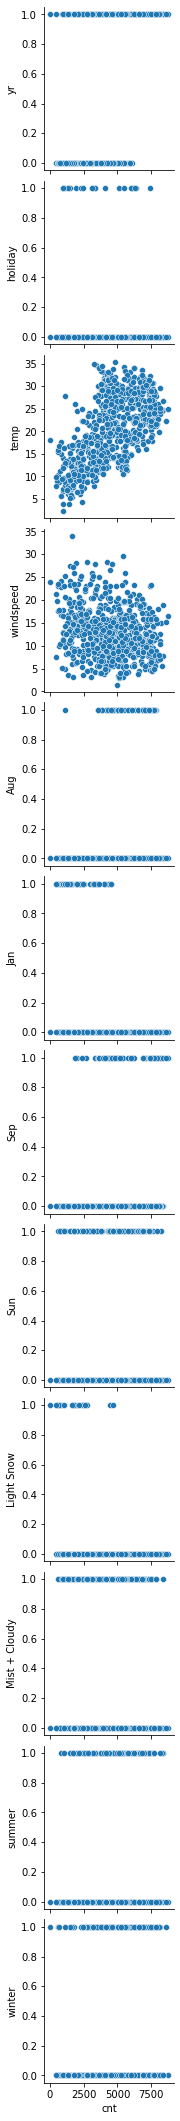

<Figure size 1152x864 with 0 Axes>

In [228]:
sns.pairplot(df, y_vars=X_train_lr3.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

In [229]:
#Temperature has a linear relationship with cnt

In [230]:
#Prediction and evaluation of test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
r2_test

0.7948895813725892

In [235]:
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
r2_train

0.8413869999763135

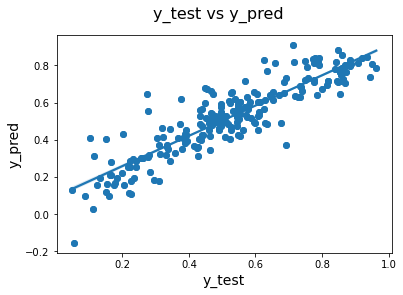

In [231]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True)
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [233]:
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
train_mse


0.007972835682130908

In [234]:
test_mse

0.009807206886144094

In [237]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7948895813725892

In [ ]:
#Summary
# The R-squared value of the train set is 84.13% whereas the test set has a value of 79.48% which suggests that our model broadly explains the variance quite accurately on the test set.
#The developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set
#We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature